In [1]:
import pandas as pd



In [2]:

# Read the CSV file into a pandas DataFrame
file_path = 'Crimes.csv'
Crimes = pd.read_csv(file_path)

# Read the CSV file into a pandas DataFrame
file_path = 'full_moon.csv'
moon = pd.read_csv(file_path)

# Read the CSV file into a pandas DataFrame
file_path = 'holidays.csv'
holidays = pd.read_csv(file_path)

# Read the CSV file into a pandas DataFrame
file_path = 'weather.csv'
weather = pd.read_csv(file_path)


In [3]:
#only run once
# Crimes['Date'] = pd.to_datetime(Crimes['Date'])

# # Format the date to YYYY-MM-DD
# Crimes['Date'] = Crimes['Date'].dt.strftime('%m/%d/%Y')


In [4]:
#Normalized moon date format
moon['FullMoonDates'] = pd.to_datetime(moon['FullMoonDates'])

# Format 'FullMoonDates' column to desired format "1/1/2010"
moon['FullMoonDates'] = moon['FullMoonDates'].dt.strftime('%m/%d/%Y')

moon


,Year,FullMoonDates
0,2005,01/25/2005
1,2005,02/24/2005
2,2005,03/25/2005
3,2005,04/24/2005
4,2005,05/23/2005
...,...,...
230,2023,08/31/2023
231,2023,09/29/2023
232,2023,10/28/2023
233,2023,11/27/2023


In [5]:
#Create a new column 'IsInMoonList' 
len(Crimes['Date'].unique())
moon_list=moon['FullMoonDates'].unique()
moon_list

Crimes['IsInMoonList'] = False
moon_set = set(moon_list)

# Set the value to True where 'Date' is in 'moon_list'
Crimes.loc[Crimes['Date'].isin(moon_set), 'IsInMoonList'] = True
Crimes
Crimes.to_csv('Crimes_moon.csv', index=False)



In [6]:
holidays['Date'] = pd.to_datetime(holidays['Date'])
Crimes['Date'] = pd.to_datetime(Crimes['Date'])
holiday_dates = holidays['Date'].tolist()


# Function to check if a date is a holiday
def is_holiday(date):
    return date in holiday_dates

# Apply the function to create the 'is_holiday' column in df_crime
Crimes['is_holiday'] = Crimes['Date'].apply(is_holiday)

# Display the updated dataframe
# Crimes


In [7]:
Crimes.to_csv('Crimes_moon_holiday.csv', index=False)


In [8]:
Crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,IsInMoonList,is_holiday
0,13210072,JG422242,2023-08-11 11:00:00,0000X S ALBANY AVE,1790,OFFENSE INVOLVING CHILDREN,CHILD ABDUCTION,RESIDENCE,False,True,...,26,1155914.0,1899709.0,2023,09/16/2023 03:41:56 PM,41.880594,-87.702959,"(41.880594385, -87.702959421)",False,False
1,13278080,JG500620,2023-11-11 00:00:00,038XX W MADISON ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,07,1150898.0,1899740.0,2023,11/18/2023 03:40:25 PM,41.880779,-87.721377,"(41.880779076, -87.721377025)",False,True
2,13276884,JG503649,2023-11-10 17:30:00,043XX W AUGUSTA BLVD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,07,1147361.0,1906313.0,2023,11/18/2023 03:40:25 PM,41.898885,-87.734196,"(41.898884591, -87.734196199)",False,False
3,12990873,JG161829,2019-08-17 13:14:00,008XX N KARLOV AVE,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,...,17,1148899.0,1905351.0,2019,09/14/2023 03:41:59 PM,41.896215,-87.728572,"(41.89621515, -87.728572048)",False,False
4,26262,JE366265,2021-09-08 16:45:00,047XX W HARRISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CAR WASH,True,False,...,01A,1144907.0,1896933.0,2021,09/14/2023 03:41:59 PM,41.873191,-87.743447,"(41.873191445, -87.743446563)",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512182,13044797,JG226598,2023-04-17 08:45:00,027XX W HARRISON ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,True,True,...,08B,1158295.0,1897254.0,2023,08/19/2023 03:40:26 PM,41.873809,-87.694284,"(41.873809306, -87.694283701)",False,False
512183,13145202,JG345638,2023-07-08 02:15:00,047XX W VAN BUREN ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,11,1144849.0,1897606.0,2023,08/19/2023 03:40:26 PM,41.875039,-87.743643,"(41.875039334, -87.743642536)",False,False
512184,13086004,JG275808,2023-05-26 00:01:00,007XX S KILBOURN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,True,...,14,1146447.0,1896199.0,2023,08/19/2023 03:40:26 PM,41.871148,-87.737811,"(41.871148079, -87.737811112)",False,False
512185,13057758,JG242228,2023-04-29 20:43:00,038XX W ADAMS ST,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,STREET,True,False,...,18,1150830.0,1898737.0,2023,08/19/2023 03:40:26 PM,41.878028,-87.721653,"(41.878028065, -87.721652966)",False,False


In [16]:
weather['datetime'] = pd.to_datetime(weather['datetime'])
# Merge the dataframes using a left join on the common columns
merged_data = pd.merge(Crimes, weather, how='left', left_on='Date', right_on='datetime')

# Now merged_data contains all the data from the Crimes dataframe with matching data from Weather dataframe

# If you want to drop the duplicate column (e.g., 'datetime' from weather dataframe)
merged_data.drop(columns=['datetime'], inplace=True)
crimes=merged_data


In [18]:
Crimes.to_csv('Crimes_moon_holiday_weather.csv', index=False)


In [19]:
#added holiday types
holidays['Date'] = pd.to_datetime(holidays['Date'])
# Merge the dataframes using a left join on the common columns
merged_data = pd.merge(Crimes, holidays, how='left', left_on='Date', right_on='Date')

# Now merged_data contains all the data from the Crimes dataframe with matching data from Weather dataframe

# If you want to drop the duplicate column (e.g., 'datetime' from weather dataframe)
crimes=merged_data

crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,IsInMoonList,is_holiday,Holiday,Day of Week
0,13210072,JG422242,2023-08-11 11:00:00,0000X S ALBANY AVE,1790,OFFENSE INVOLVING CHILDREN,CHILD ABDUCTION,RESIDENCE,False,True,...,1899709.0,2023,09/16/2023 03:41:56 PM,41.880594,-87.702959,"(41.880594385, -87.702959421)",False,False,NaN,NaN
1,13278080,JG500620,2023-11-11 00:00:00,038XX W MADISON ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,1899740.0,2023,11/18/2023 03:40:25 PM,41.880779,-87.721377,"(41.880779076, -87.721377025)",False,True,Veterans Day,Saturday
2,13276884,JG503649,2023-11-10 17:30:00,043XX W AUGUSTA BLVD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,1906313.0,2023,11/18/2023 03:40:25 PM,41.898885,-87.734196,"(41.898884591, -87.734196199)",False,False,NaN,NaN
3,12990873,JG161829,2019-08-17 13:14:00,008XX N KARLOV AVE,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,...,1905351.0,2019,09/14/2023 03:41:59 PM,41.896215,-87.728572,"(41.89621515, -87.728572048)",False,False,NaN,NaN
4,26262,JE366265,2021-09-08 16:45:00,047XX W HARRISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CAR WASH,True,False,...,1896933.0,2021,09/14/2023 03:41:59 PM,41.873191,-87.743447,"(41.873191445, -87.743446563)",False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512182,13044797,JG226598,2023-04-17 08:45:00,027XX W HARRISON ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,True,True,...,1897254.0,2023,08/19/2023 03:40:26 PM,41.873809,-87.694284,"(41.873809306, -87.694283701)",False,False,NaN,NaN
512183,13145202,JG345638,2023-07-08 02:15:00,047XX W VAN BUREN ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,1897606.0,2023,08/19/2023 03:40:26 PM,41.875039,-87.743643,"(41.875039334, -87.743642536)",False,False,NaN,NaN
512184,13086004,JG275808,2023-05-26 00:01:00,007XX S KILBOURN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,True,...,1896199.0,2023,08/19/2023 03:40:26 PM,41.871148,-87.737811,"(41.871148079, -87.737811112)",False,False,NaN,NaN
512185,13057758,JG242228,2023-04-29 20:43:00,038XX W ADAMS ST,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,STREET,True,False,...,1898737.0,2023,08/19/2023 03:40:26 PM,41.878028,-87.721653,"(41.878028065, -87.721652966)",False,False,NaN,NaN


In [20]:
len(crimes['Date'].value_counts())


443878

In [21]:


dates=crimes['Date'].value_counts()
dates.to_csv('dates.csv', index=True)
# Crimes


520642

In [22]:

start_date = '2001-01-01'
end_date = '2024-02-24'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
date_range = pd.DataFrame(date_range, columns=['Date'])
date_range

,Date
0,2001-01-01
1,2001-01-02
2,2001-01-03
3,2001-01-04
4,2001-01-05
...,...
8450,2024-02-20
8451,2024-02-21
8452,2024-02-22
8453,2024-02-23


In [23]:
result_df = pd.concat([date_range, Crimes['Date']], ignore_index=True)


In [27]:
data=pd.read_csv('Crimes_moon_holiday_weather.csv')


0    2023-08-11 11:00:00
1    2023-11-11 00:00:00
2    2023-11-10 17:30:00
3    2019-08-17 13:14:00
4    2021-09-08 16:45:00
Name: Date, dtype: object

In [30]:
data['Date'] = pd.to_datetime(data['Date'])

# Extract the date part only
data['Date'] = data['Date'].dt.date
data['Date'] 

0         2023-08-11
1         2023-11-11
2         2023-11-10
3         2019-08-17
4         2021-09-08
             ...    
512182    2023-04-17
512183    2023-07-08
512184    2023-05-26
512185    2023-04-29
512186    2023-06-19
Name: Date, Length: 512187, dtype: object

Crime Counts

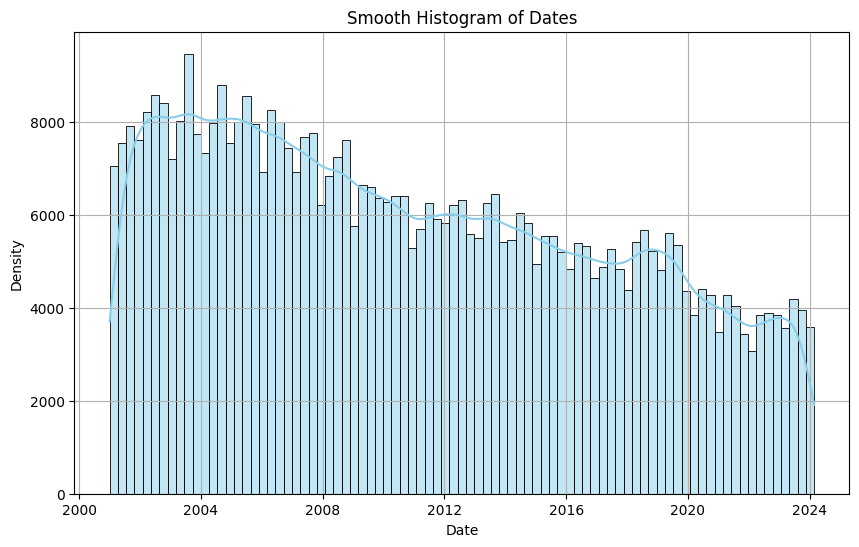

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Data is your DataFrame containing the 'Date' column
# Convert 'Date' column to datetime if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Plot the KDE histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Date'], kde=True, color='skyblue')
plt.title('Smooth Histogram of Dates')
plt.xlabel('Date')
plt.ylabel('Density')
plt.grid(True)
plt.show()


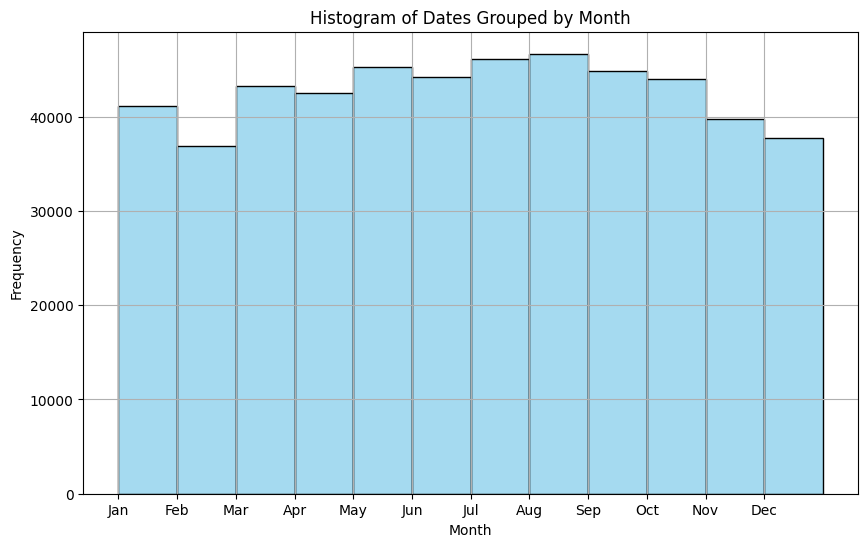

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Data is your DataFrame containing the 'Date' column
# Convert 'Date' column to datetime if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Extract month from the 'Date' column
data['Month'] = data['Date'].dt.month

# Plot the histogram with bars grouped by month
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Month', bins=range(1, 14), element='bars', color='skyblue')
plt.title('Histogram of Dates Grouped by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


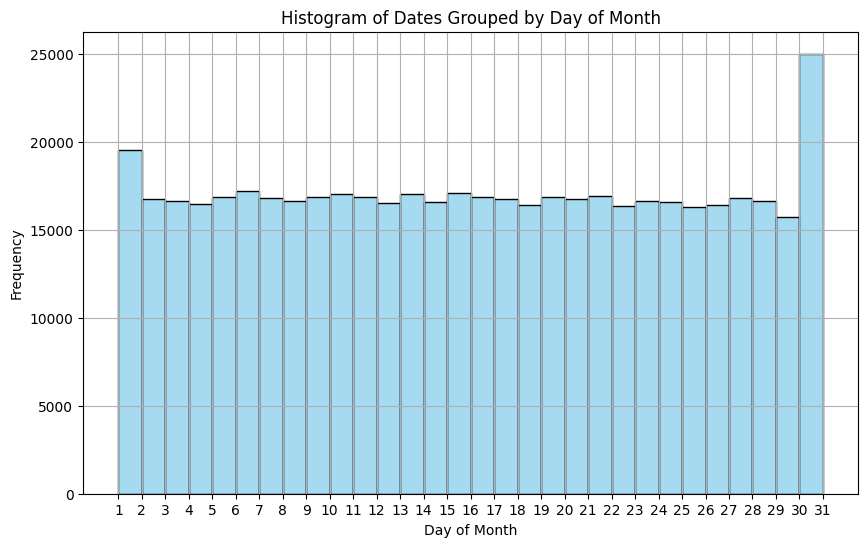

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Data is your DataFrame containing the 'Date' column
# Convert 'Date' column to datetime if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Extract day of the month from the 'Date' column
data['DayOfMonth'] = data['Date'].dt.day

# Plot the histogram grouped by day of the month
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='DayOfMonth', bins=range(1, 32), color='skyblue')
plt.title('Histogram of Dates Grouped by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(range(1, 32))
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


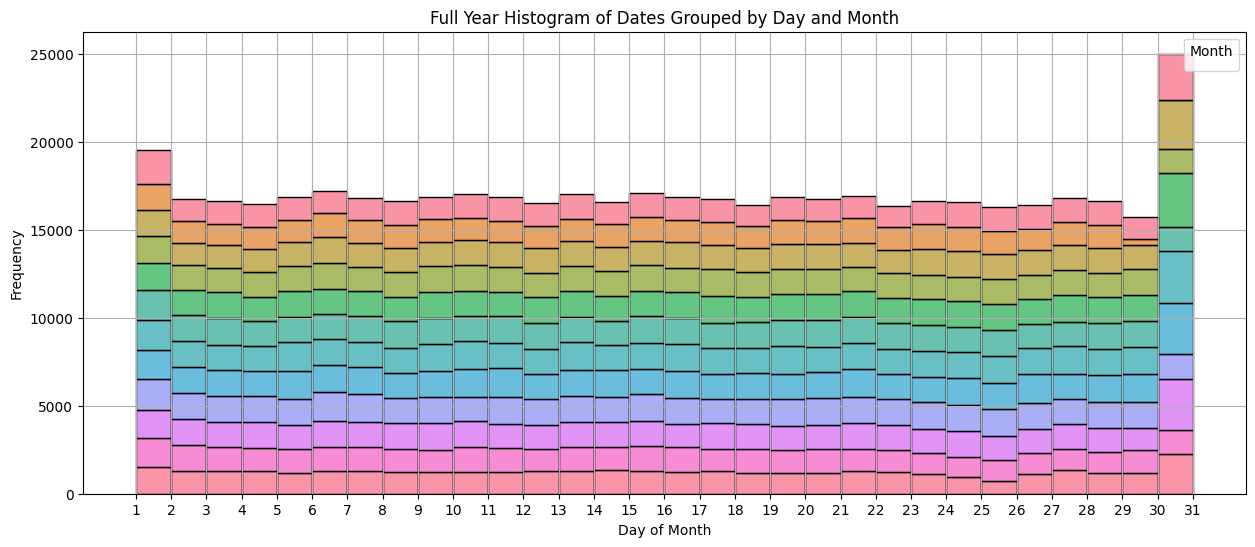

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Data is your DataFrame containing the 'Date' column
# Convert 'Date' column to datetime if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Extract day and month from the 'Date' column
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month

# Plot the histogram grouped by both day and month
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='Day', bins=range(1, 32), hue='Month', multiple='stack', palette='husl')
plt.title('Full Year Histogram of Dates Grouped by Day and Month')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(range(1, 32))
plt.legend(title='Month', loc='upper right')
plt.show()
